In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("../data/sales.csv",header=None)
df = df[0].str.split(",",expand=True)
df.columns = ['Date','Product','Category','Quantity','Price']
df.head()

,Date,Product,Category,Quantity,Price
0,Date,Product,Category,Quantity,Price
1,2024-01-05,Laptop,Electronics,2,55000
2,2024-01-10,Mobile,Electronics,5,20000
3,2024-02-12,Headphones,Electronics,10,1500
4,2024-02-15,Chair,Furniture,3,3000


In [6]:
df.columns

Index(['Date', 'Product', 'Category', 'Quantity', 'Price'], dtype='object')

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Quantity'] = df['Quantity'].astype(int)
df['Price'] = df['Price'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      10 non-null     datetime64[ns]
 1   Product   10 non-null     object        
 2   Category  10 non-null     object        
 3   Quantity  10 non-null     int32         
 4   Price     10 non-null     int32         
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 452.0+ bytes


In [8]:
df['Date'] = df['Date'].astype(str).str.strip()
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
df.head()

C:\Users\ashis\AppData\Local\Temp\ipykernel_4340\3645692672.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'],errors='coerce')


,Date,Product,Category,Quantity,Price
0,NaT,Product,Category,Quantity,Price
1,2024-01-05,Laptop,Electronics,2,55000
2,2024-01-10,Mobile,Electronics,5,20000
3,2024-02-12,Headphones,Electronics,10,1500
4,2024-02-15,Chair,Furniture,3,3000


In [9]:
df = df.dropna(subset=['Date'])
df.reset_index(drop=True,inplace=True)
df.head()

,Date,Product,Category,Quantity,Price
0,2024-01-05,Laptop,Electronics,2,55000
1,2024-01-10,Mobile,Electronics,5,20000
2,2024-02-12,Headphones,Electronics,10,1500
3,2024-02-15,Chair,Furniture,3,3000
4,2024-03-01,Table,Furniture,2,7000


In [14]:
df['Total_Sales'] = df['Quantity'] * df['Price']
df['Month'] = df['Date'].dt.month
df.head()


,Date,Product,Category,Quantity,Price,Total_Sales,Month
0,2024-01-05,Laptop,Electronics,2,55000,110000,1
1,2024-01-10,Mobile,Electronics,5,20000,100000,1
2,2024-02-12,Headphones,Electronics,10,1500,15000,2
3,2024-02-15,Chair,Furniture,3,3000,9000,2
4,2024-03-01,Table,Furniture,2,7000,14000,3


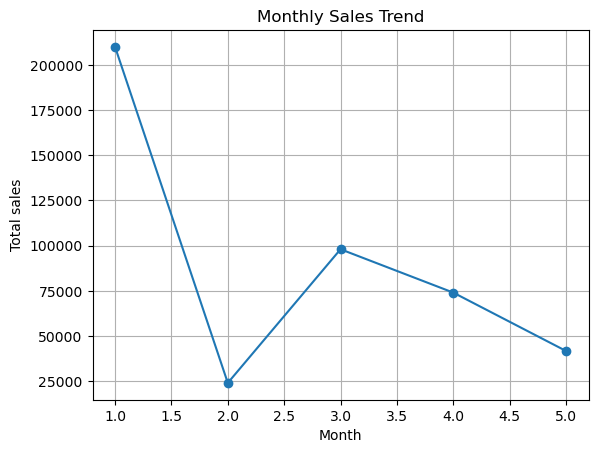

In [16]:
monthly_sales = df.groupby('Month')['Total_Sales'].sum()
plt.Figure(figsize=(8,4))
plt.plot(monthly_sales.index,monthly_sales.values,marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total sales")
plt.grid(True)
plt.show()

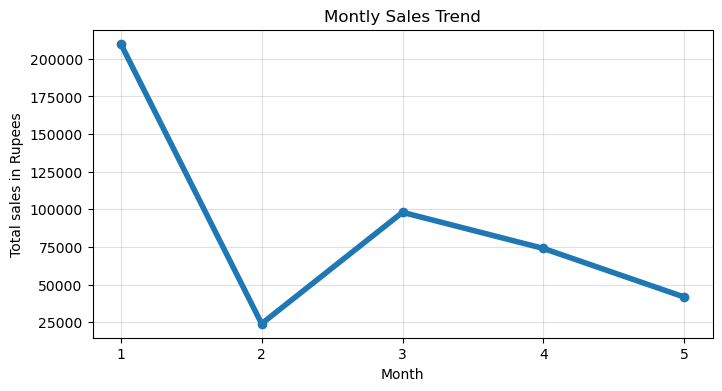

In [20]:
plt.figure(figsize=(8,4))
plt.plot(monthly_sales.index,monthly_sales.values,marker='o',linewidth=4)
plt.title("Montly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total sales in Rupees")
plt.xticks(monthly_sales.index)
plt.grid(alpha=0.4)
plt.show()

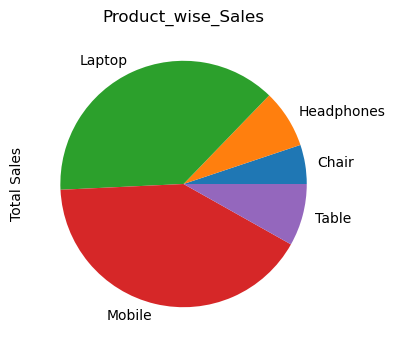

In [23]:
product_sales = df.groupby('Product')['Total_Sales'].sum()
plt.figure(figsize=(8,4))
product_sales.plot(kind='pie')
plt.title("Product_wise_Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [26]:
x = df[['Month','Quantity','Price']]
y = df[['Total_Sales']]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [28]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [30]:
y_pred = model.predict(x_test)


In [31]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2 score", r2)
print("Mean Squared Error: ",mse)


R2 score 0.3449024370502598
Mean Squared Error:  1069224038.344048


In [32]:
#predict future sale
future_data = pd.DataFrame({'Month':[6],'Quantity':[5],'Price':[20000]})
future_sales = model.predict(future_data)
print("Pridiction Sales :",future_sales[0])

Pridiction Sales : [23306.53389032]
